<a href="https://colab.research.google.com/github/mmk32001/New-Repository/blob/master/Fake_News_Prediction_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import metrics

In [3]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
print(fake.shape)
print(true.shape)

(23481, 4)
(21417, 4)


In [5]:
# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

In [6]:
fake.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [7]:
true.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


In [8]:
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [9]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

In [10]:
data.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [11]:
data.tail()

,title,text,subject,date,target
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",true


In [12]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [13]:
data.head()

,title,text,subject,date,target
0,Factbox: Short list of potential Trump adminis...,WASHINGTON (Reuters) - U.S. President-elect Do...,politicsNews,"November 16, 2016",true
1,China pledges to be more open to providing inf...,SHANGHAI (Reuters) - Central and local governm...,worldnews,"November 21, 2017",true
2,Ex-NAACP chief Ben Jealous to run for Maryland...,WASHINGTON (Reuters) - Former NAACP President ...,politicsNews,"May 31, 2017",true
3,A-LIST DEMOCRATS Attend Obama’s Last Taxpayer-...,Via: TMZOlivia Wilde posed for a black and whi...,left-news,"Jan 7, 2017",fake
4,Don Jr. Tries To Mock Al Franken’s Resignatio...,When Sen. Al Franken (D-MN) announced his plan...,News,"December 7, 2017",fake


In [14]:
# Removing the date 
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,Factbox: Short list of potential Trump adminis...,WASHINGTON (Reuters) - U.S. President-elect Do...,politicsNews,true
1,China pledges to be more open to providing inf...,SHANGHAI (Reuters) - Central and local governm...,worldnews,true
2,Ex-NAACP chief Ben Jealous to run for Maryland...,WASHINGTON (Reuters) - Former NAACP President ...,politicsNews,true
3,A-LIST DEMOCRATS Attend Obama’s Last Taxpayer-...,Via: TMZOlivia Wilde posed for a black and whi...,left-news,fake
4,Don Jr. Tries To Mock Al Franken’s Resignatio...,When Sen. Al Franken (D-MN) announced his plan...,News,fake


In [15]:
# Removing the title
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,WASHINGTON (Reuters) - U.S. President-elect Do...,politicsNews,true
1,SHANGHAI (Reuters) - Central and local governm...,worldnews,true
2,WASHINGTON (Reuters) - Former NAACP President ...,politicsNews,true
3,Via: TMZOlivia Wilde posed for a black and whi...,left-news,fake
4,When Sen. Al Franken (D-MN) announced his plan...,News,fake


In [16]:
# Convert to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,washington (reuters) - u.s. president-elect do...,politicsNews,true
1,shanghai (reuters) - central and local governm...,worldnews,true
2,washington (reuters) - former naacp president ...,politicsNews,true
3,via: tmzolivia wilde posed for a black and whi...,left-news,fake
4,when sen. al franken (d-mn) announced his plan...,News,fake


In [17]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [18]:
data.head()

,text,subject,target
0,washington reuters us presidentelect donald t...,politicsNews,true
1,shanghai reuters central and local government...,worldnews,true
2,washington reuters former naacp president ben...,politicsNews,true
3,via tmzolivia wilde posed for a black and whit...,left-news,fake
4,when sen al franken dmn announced his plans to...,News,fake


In [19]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
data.head()

,text,subject,target
0,washington reuters us presidentelect donald tr...,politicsNews,true
1,shanghai reuters central local governments ope...,worldnews,true
2,washington reuters former naacp president ben ...,politicsNews,true
3,via tmzolivia wilde posed black white selfie p...,left-news,fake
4,sen al franken dmn announced plans resign thur...,News,fake


In [21]:
data.tail()

,text,subject,target
44893,horrific attacks claimed 50 lives wounded 53 o...,News,fake
44894,,Government News,fake
44895,president obama new budget eliminate governmen...,News,fake
44896,tuesday morning attendees senate subcommittee ...,News,fake
44897,wow clearly something white house prepared pac...,politics,fake


In [22]:

def remove_numbers(text):
    clean_str = re.sub('[^a-zA-Z]',' ',text)
    return clean_str


data['text'] = data['text'].apply(remove_numbers)

In [23]:
data.tail()

,text,subject,target
44893,horrific attacks claimed lives wounded o...,News,fake
44894,,Government News,fake
44895,president obama new budget eliminate governmen...,News,fake
44896,tuesday morning attendees senate subcommittee ...,News,fake
44897,wow clearly something white house prepared pac...,politics,fake


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


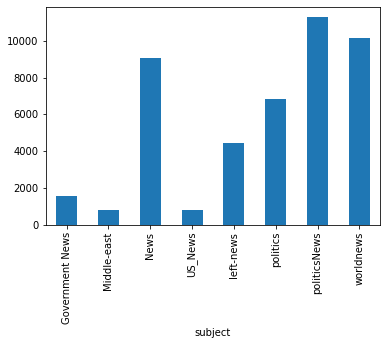

In [24]:
# How many articles per subject?

print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


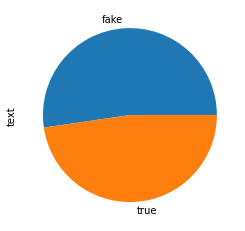

In [25]:
# How many fake and real articles?

print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="pie")
plt.show()

In [26]:
pip install wordcloud

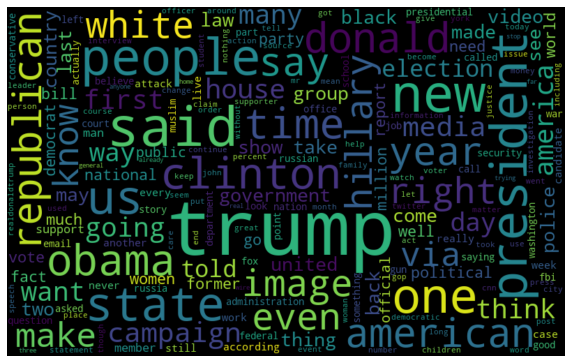

In [27]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

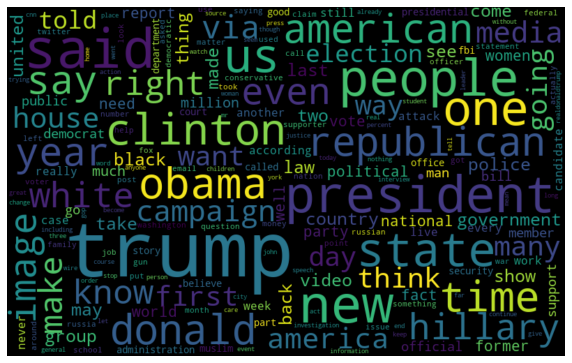

In [28]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [29]:
# Most frequent words counter   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

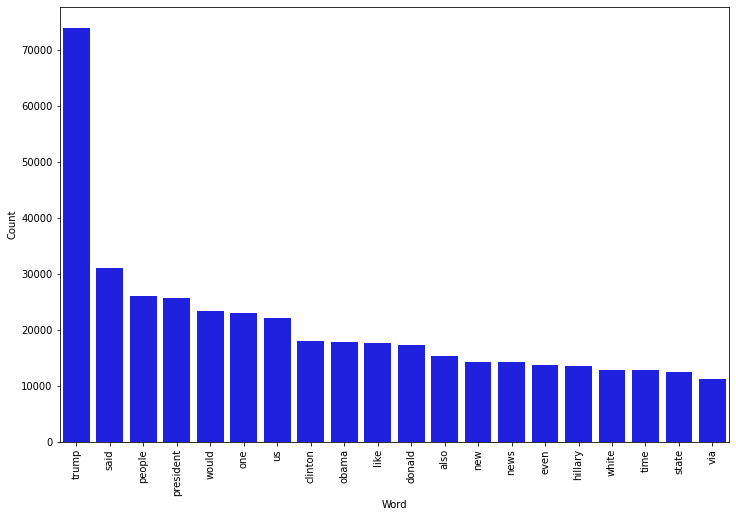

In [30]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

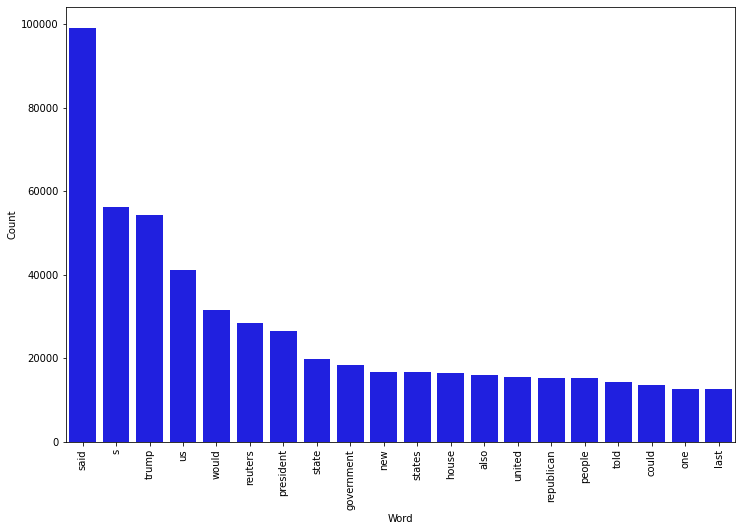

In [31]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

In [32]:
from sklearn import preprocessing
 
label_encoder = preprocessing.LabelEncoder()
 
data['target']= label_encoder.fit_transform(data['target'])
 
data['target'].unique()

array([1, 0])

In [33]:
targets=data.target
targets.head()

0    1
1    1
2    1
3    0
4    0
Name: target, dtype: int64

In [34]:
data['target'].unique()

array([1, 0])

In [35]:
print(data['target'])

0        1
1        1
2        1
3        0
4        0
        ..
44893    0
44894    0
44895    0
44896    0
44897    0
Name: target, Length: 44898, dtype: int64


In [36]:
# Split the dataset
x_train,x_test,y_train,y_test=train_test_split(data['text'], targets, test_size=0.4, random_state=7)

In [37]:
# Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

In [38]:
# Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [39]:
# Initialize a PassiveAggressiveClassifier

pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [40]:
# Predict on the test set and calculate accuracy

y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Passive Aggressive Classifier Accuracy: {round(score*100,2)}%')

Passive Aggressive Classifier Accuracy: 99.28%


In [41]:
#Build confusion matrix
cm = confusion_matrix(y_test,y_pred, labels=[0,1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


[Text(0, 0.5, 'Real'), Text(0, 1.5, 'Fake')]

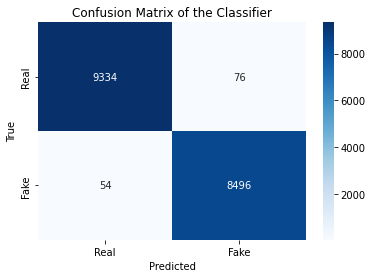

In [42]:
#plotting confusion matrix
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd')
plt.title('Confusion Matrix of the Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

ax = plt.axes()
ax.set_xticklabels(["Real", "Fake"])
  

ax.set_yticklabels(["Real", "Fake"])

In [43]:
# True REAL = 4793
# True FAKE = 4208
# False REAL = 24
# False FAKE = 14

In [44]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(x_train, y_train)

# Accuracy
prediction = model.predict(x_test)
print("Decision Tree Classifier Accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

Decision Tree Classifier Accuracy: 99.58%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


[Text(0, 0.5, 'Real'), Text(0, 1.5, 'Fake')]

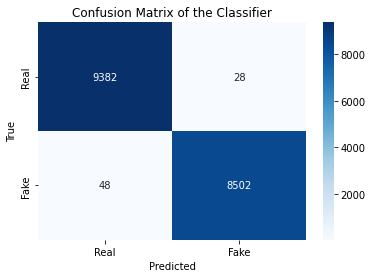

In [45]:
cm = confusion_matrix(y_test, prediction)
#plotting confusion matrix
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd')
plt.title('Confusion Matrix of the Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

ax = plt.axes()
ax.set_xticklabels(["Real", "Fake"])
  

ax.set_yticklabels(["Real", "Fake"])

In [46]:
clf=RandomForestClassifier()
clf.fit(tfidf_train,y_train)

RandomForestClassifier()

In [47]:
predic = model.predict(x_test)
print("Random Forest Classifier Accuracy: {}%".format(round(accuracy_score(y_test, predic)*100,2)))

Random Forest Classifier Accuracy: 99.58%


In [48]:
print(predic)

[0 1 1 ... 1 1 1]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


[Text(0, 0.5, 'Real'), Text(0, 1.5, 'Fake')]

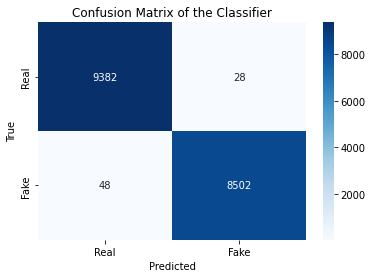

In [49]:
cm = confusion_matrix(y_test, predic)
#plotting confusion matrix
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd')
plt.title('Confusion Matrix of the Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

ax = plt.axes()
ax.set_xticklabels(["Real", "Fake"])
  

ax.set_yticklabels(["Real", "Fake"])

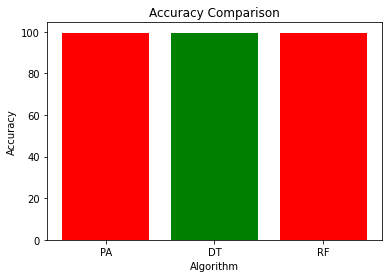

In [50]:
left = [1, 2, 3]
height = [round(score*100,2), round(accuracy_score(y_test, prediction)*100,2), round(accuracy_score(y_test, predic)*100,2)]
tick_label = ['PA', 'DT', 'RF']
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['red', 'green'])
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
 
plt.show()

In [51]:
# svm model

In [54]:
svmmodel1=svm.SVC(kernel="linear")
svmmodel1.fit(tfidf_train,y_train)


SVC(kernel='linear')

In [55]:
y_pred1=svmmodel1.predict(tfidf_test)


In [69]:
print("SVM(Linear) Accuracy: {}%".format(round(accuracy_score(y_test, y_pred1)*100,2)))

SVM(Linear) Accuracy: 99.25%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


[Text(0, 0.5, 'Real'), Text(0, 1.5, 'Fake')]

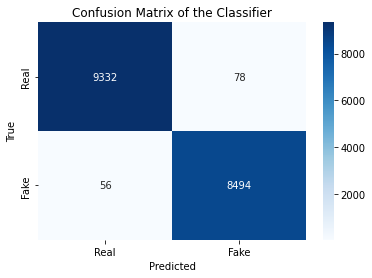

In [70]:
cm = confusion_matrix(y_test,y_pred1)
#plotting confusion matrix
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd')
plt.title('Confusion Matrix of the Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

ax = plt.axes()
ax.set_xticklabels(["Real", "Fake"])
  

ax.set_yticklabels(["Real", "Fake"])

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
ipmodel= LogisticRegression()

In [60]:
ipmodel.fit(tfidf_train,y_train)    

LogisticRegression()

In [71]:
y_prediction = ipmodel.predict(tfidf_test)
testing_data_accuracy = accuracy_score(y_prediction, y_test)
print("Logistic Regression Accuracy: {}%".format(round(testing_data_accuracy*100,2)))

Logistic Regression Accuracy: 98.15%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


[Text(0, 0.5, 'Real'), Text(0, 1.5, 'Fake')]

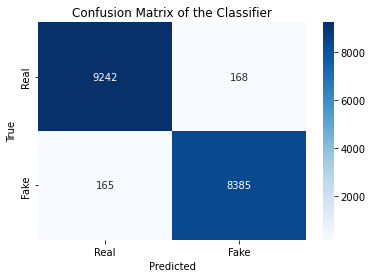

In [75]:
cm = confusion_matrix(y_test,y_prediction)
#plotting confusion matrix
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd')
plt.title('Confusion Matrix of the Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

ax = plt.axes()
ax.set_xticklabels(["Real", "Fake"])
  

ax.set_yticklabels(["Real", "Fake"])

In [85]:
print(y_test)

25168    0
5096     1
3123     1
37809    1
27507    1
        ..
9603     1
42809    0
820      1
37697    1
23394    1
Name: target, Length: 17960, dtype: int64


In [95]:
i=int(input())
X_new = tfidf_test[i]

prediction = pac.predict(X_new)
print(prediction)

if (prediction[0]==1):
  print('The news is Real')
else:
  print('The news is Fake')

17959
[1]
The news is Real
